In [3]:
import pandas as pd  # For handling dataframes and data manipulation
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import plotly.express as px

In [16]:
# Load the CSV file into a DataFrame
file_path = '../CSV_files/world_wide_self_harm_and_substance_deaths.csv'  
df = pd.read_csv(file_path)

# Display the first few rows to verify the import
df.head()


,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
0,2017,Intentional self-harm,0,GBR,Female,0,743552.0,United Kingdom
1,2017,Intentional self-harm,0,GBR,Male,0,782850.0,United Kingdom
2,2017,Intentional self-harm,1,GBR,Female,0,768444.0,United Kingdom
3,2017,Intentional self-harm,1,GBR,Male,0,810126.0,United Kingdom
4,2017,Intentional self-harm,10-14,GBR,Female,16,3640314.0,United Kingdom


In [18]:
df = df.drop(columns=['ISO_Code'])
df.head()

,Year,Cause,Age_Range,Sex,Deaths,Age_and_Sex_Population,Country
0,2017,Intentional self-harm,0,Female,0,743552.0,United Kingdom
1,2017,Intentional self-harm,0,Male,0,782850.0,United Kingdom
2,2017,Intentional self-harm,1,Female,0,768444.0,United Kingdom
3,2017,Intentional self-harm,1,Male,0,810126.0,United Kingdom
4,2017,Intentional self-harm,10-14,Female,16,3640314.0,United Kingdom


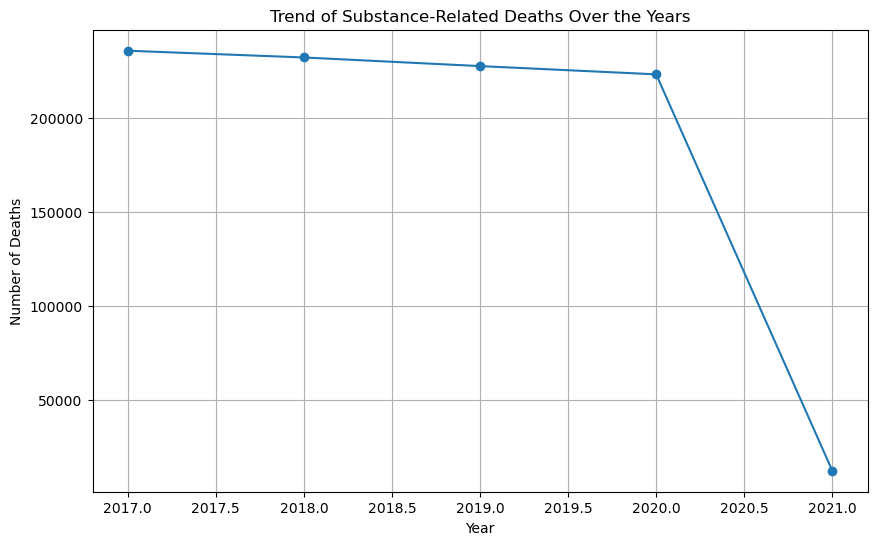

In [20]:
# Filter for substance-related deaths
substance_deaths = df[df['Cause'].str.contains("substance", case=False)]

# Group by year and sum the deaths
substance_trend = substance_deaths.groupby('Year')['Deaths'].sum().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(substance_trend['Year'], substance_trend['Deaths'], marker='o')
plt.title("Trend of Substance-Related Deaths Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.grid(True)
plt.show()

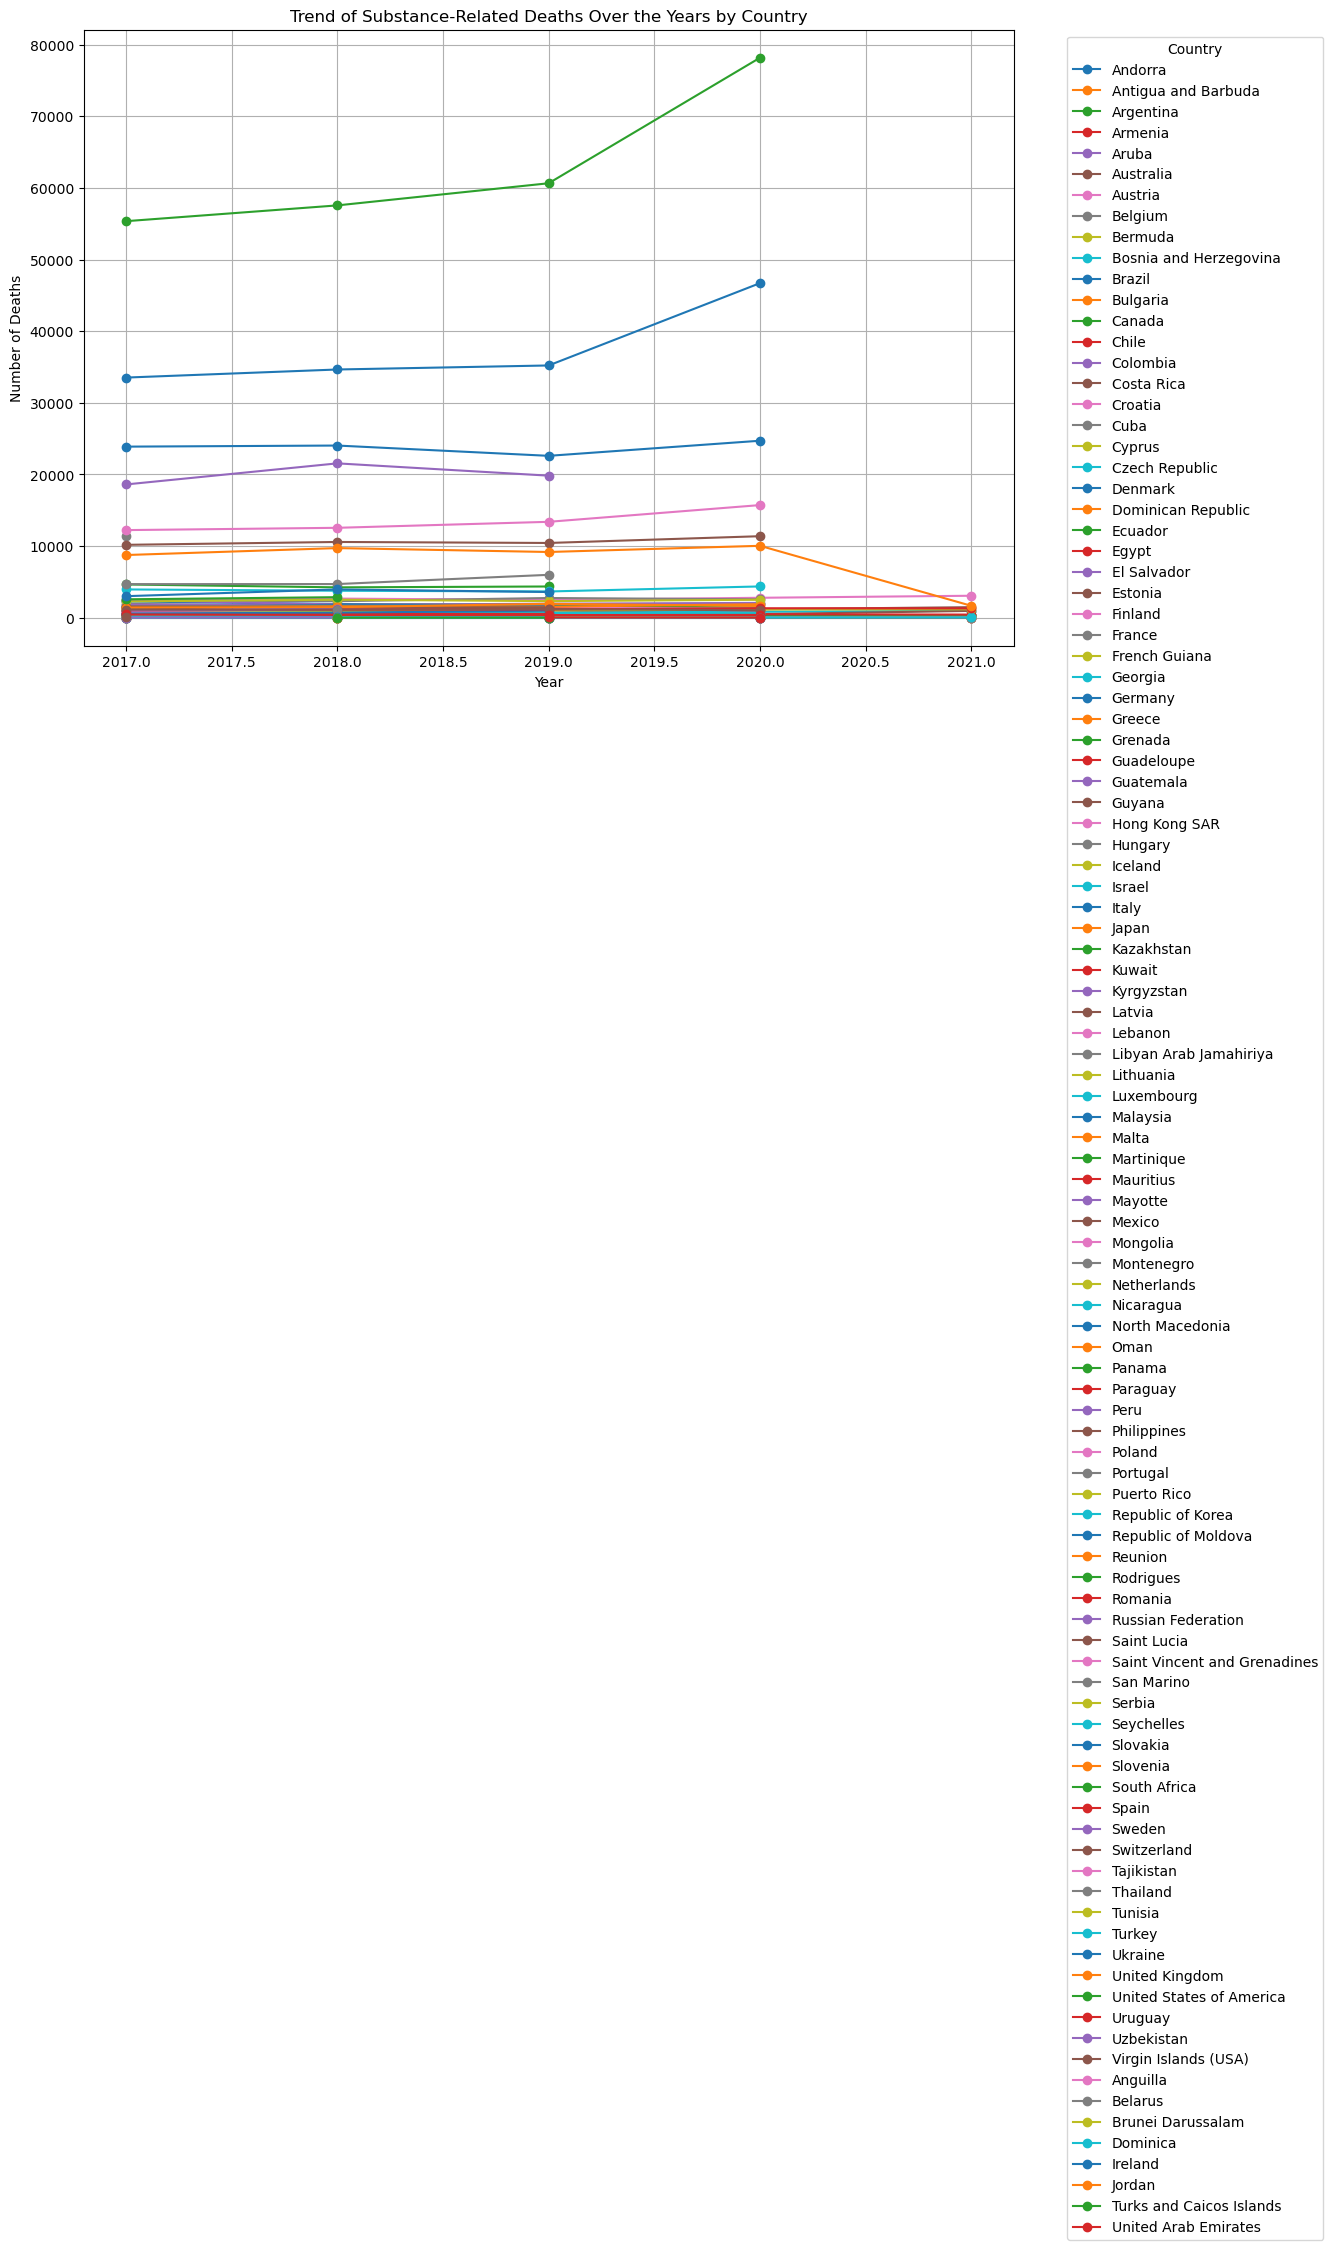

In [22]:
# Filter for substance-related deaths
substance_deaths = df[df['Cause'].str.contains("substance", case=False)]

# Group by Year and Country, summing the deaths
substance_trend_by_country = substance_deaths.groupby(['Year', 'Country'])['Deaths'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
for country in substance_trend_by_country['Country'].unique():
    country_data = substance_trend_by_country[substance_trend_by_country['Country'] == country]
    plt.plot(country_data['Year'], country_data['Deaths'], marker='o', label=country)

plt.title("Trend of Substance-Related Deaths Over the Years by Country")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

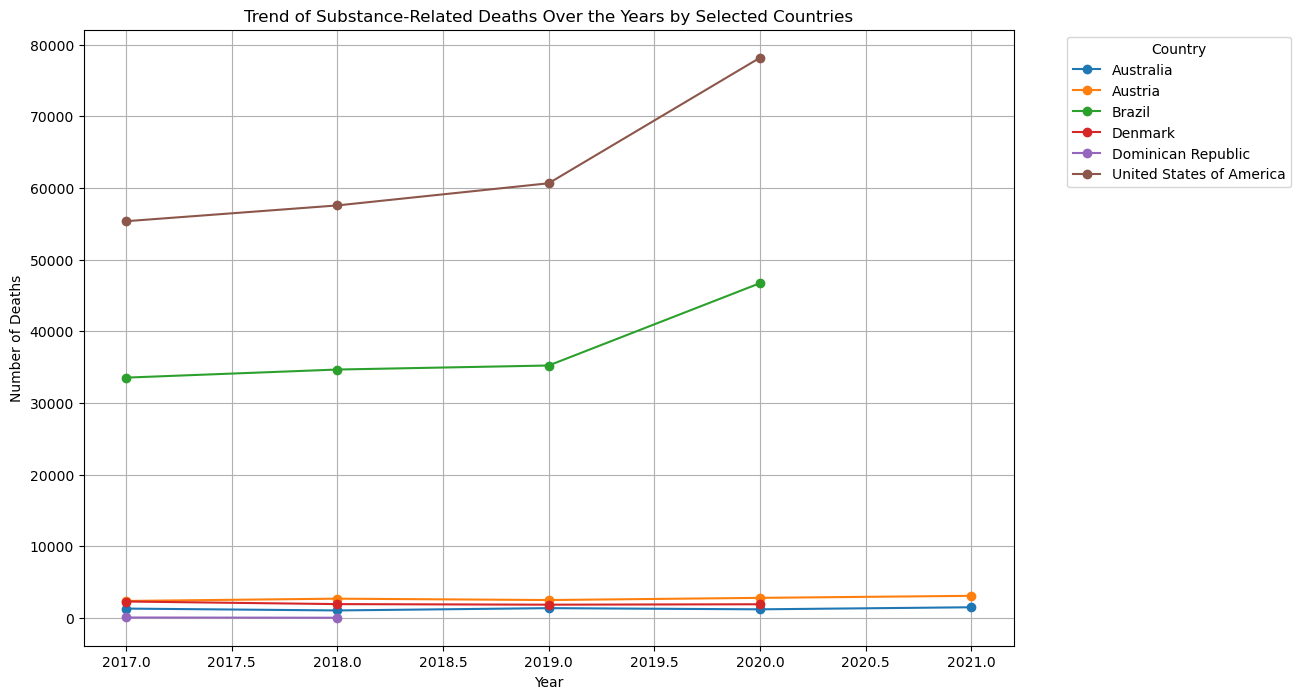

In [23]:
# Define countries to include or exclude
countries_to_include = ['United States of America', 'Dominican Republic', 'Australia', 'Brazil', 'Denmark', 'Austria']

# Filter the data to include only specified countries
filtered_data = substance_trend_by_country[substance_trend_by_country['Country'].isin(countries_to_include)]

# Plot filtered data
plt.figure(figsize=(12, 8))
for country in filtered_data['Country'].unique():
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Year'], country_data['Deaths'], marker='o', label=country)

plt.title("Trend of Substance-Related Deaths Over the Years by Selected Countries")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

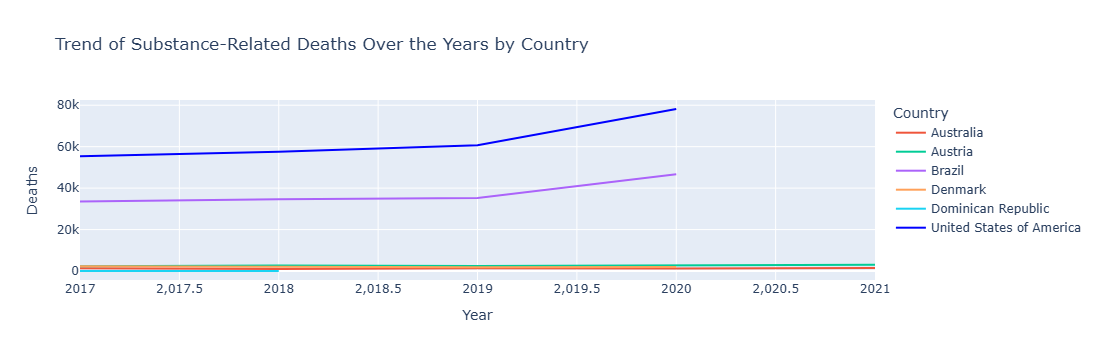

In [37]:
import plotly.express as px

# Filter data for specific countries if desired
filtered_data = substance_trend_by_country[substance_trend_by_country['Country'].isin(countries_to_include)]

# Create an interactive plot with specified color for United States
fig = px.line(filtered_data, x='Year', y='Deaths', color='Country',
              title="Trend of Substance-Related Deaths Over the Years by Country",
              labels={'Deaths': 'Number of Deaths'},
              color_discrete_map={"United States of America": "blue"})  # Setting the color for the USA

fig.update_layout(xaxis_title="Year", yaxis_title="Deaths", legend_title="Country")
fig.show()


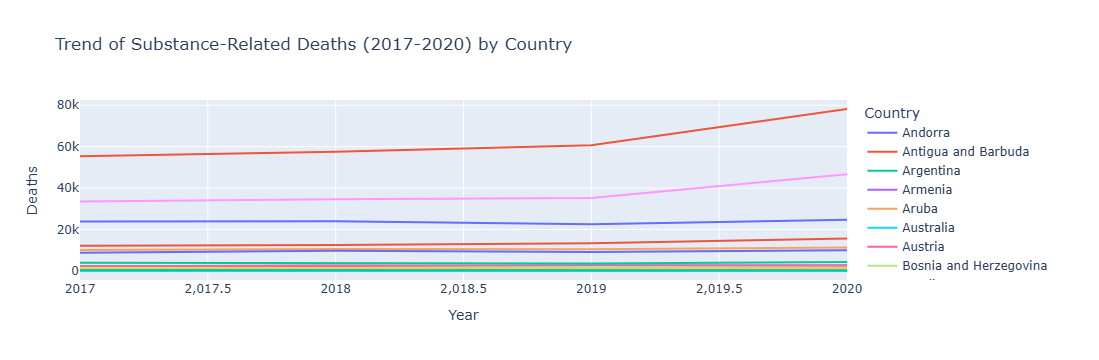

In [27]:
# Define the years of interest
years_of_interest = [2017, 2018, 2019, 2020]

# Filter data for the selected years
filtered_data = substance_trend_by_country[substance_trend_by_country['Year'].isin(years_of_interest)]

# Identify countries with complete data from 2017 to 2020
countries_with_complete_data = (
    filtered_data.groupby('Country')['Year']
    .nunique()
    .reset_index()
    .query('Year == 4')['Country']
)

# Filter the data to include only countries with complete data
filtered_data = filtered_data[filtered_data['Country'].isin(countries_with_complete_data)]

# Create an interactive plot using Plotly
import plotly.express as px

fig = px.line(filtered_data, x='Year', y='Deaths', color='Country',
              title="Trend of Substance-Related Deaths (2017-2020) by Country",
              labels={'Deaths': 'Number of Deaths'})

fig.update_layout(xaxis_title="Year", yaxis_title="Deaths", legend_title="Country")
fig.show()


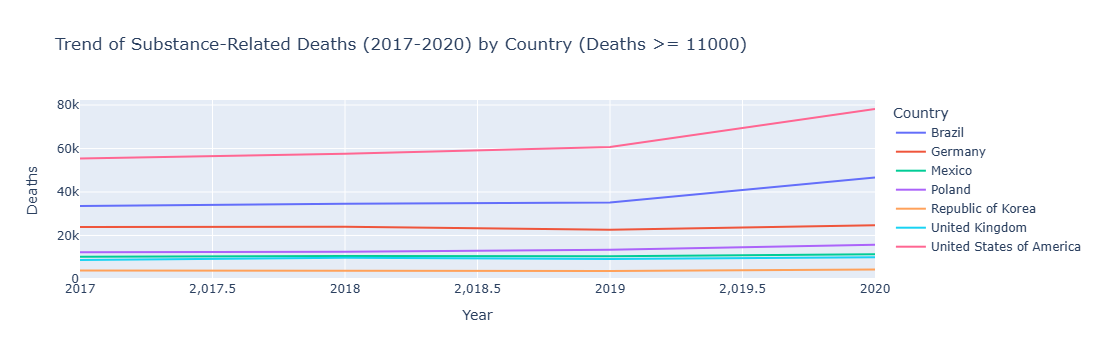

In [28]:
# Define the minimum threshold for total deaths across 2017-2020
death_threshold = 11000  # Adjustable

# Keep only countries with complete data for 2017-2020
filtered_data = filtered_data[filtered_data['Country'].isin(countries_with_complete_data)]

#Calculate the total deaths per country over 2017-2020 and apply the death threshold
country_death_totals = (
    filtered_data.groupby('Country')['Deaths']
    .sum()
    .reset_index()
    .rename(columns={'Deaths': 'Total_Deaths'})
)
high_death_countries = country_death_totals[country_death_totals['Total_Deaths'] >= death_threshold]['Country']
filtered_data_high_death = filtered_data[filtered_data['Country'].isin(high_death_countries)]

# Step 5: Plot the filtered data
fig = px.line(filtered_data_high_death, x='Year', y='Deaths', color='Country',
              title=f"Trend of Substance-Related Deaths (2017-2020) by Country (Deaths >= {death_threshold})",
              labels={'Deaths': 'Number of Deaths'})

fig.update_layout(xaxis_title="Year", yaxis_title="Deaths", legend_title="Country")
fig.show()


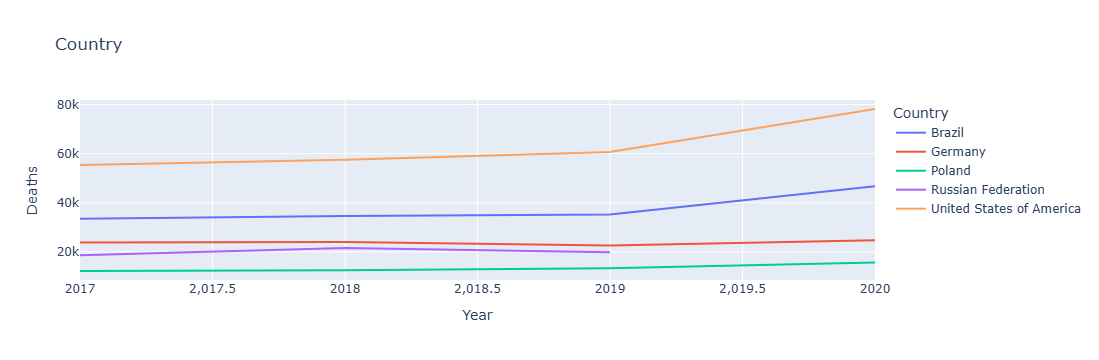

In [29]:
# filter for years of interest
years_of_interest = [2017, 2018, 2019, 2020]
filtered_data = substance_trend_by_country[substance_trend_by_country['Year'].isin(years_of_interest)] 

#Sum of total deaths by country
country_death_totals = filtered_data.groupby('Country')['Deaths'].sum().reset_index()

# Top 5 by death count
top_5_countries = country_death_totals.nlargest(5, 'Deaths')['Country']

# filtered data
filtered_data_top_5 = filtered_data[filtered_data['Country'].isin(top_5_countries)]

# Plotting
fig = px.line(filtered_data_top_5, x='Year', y='Deaths', color='Country',
              title='Top 5 substance-related Deaths (2017 - 2020)',
              labels={'Deaths': 'Number of Deaths'})

fig.update_layout(xaxis_title="Year", yaxis_title='Deaths', title="Country")
fig.show()
                                                
                                                    


Correlate the above data with amount of rehab facilities across key countries

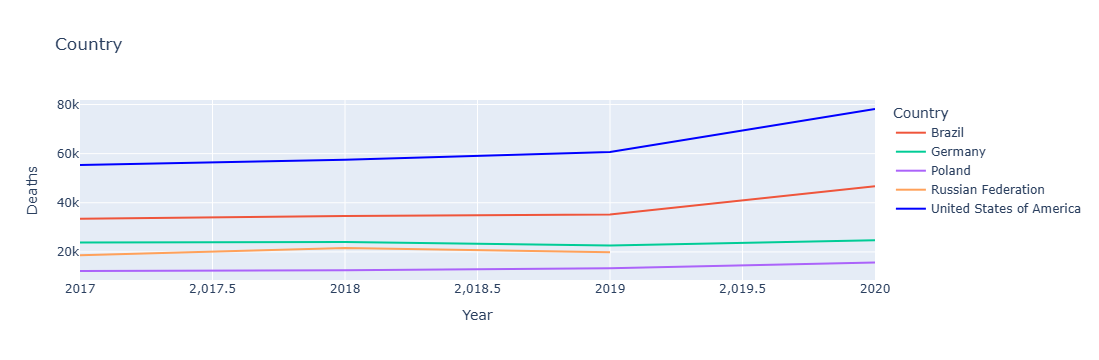

In [31]:
import plotly.express as px

# Filter for years of interest
years_of_interest = [2017, 2018, 2019, 2020]
filtered_data = substance_trend_by_country[substance_trend_by_country['Year'].isin(years_of_interest)] 

# Sum of total deaths by country
country_death_totals = filtered_data.groupby('Country')['Deaths'].sum().reset_index()

# Top 5 by death count
top_5_countries = country_death_totals.nlargest(5, 'Deaths')['Country']

# Filtered data
filtered_data_top_5 = filtered_data[filtered_data['Country'].isin(top_5_countries)]

# Plotting with specified color for United States of America
fig = px.line(filtered_data_top_5, x='Year', y='Deaths', color='Country',
              title='Top 5 substance-related Deaths (2017 - 2020)',
              labels={'Deaths': 'Number of Deaths'},
              color_discrete_map={"United States of America": "blue"})  # Setting the color for the USA

fig.update_layout(xaxis_title="Year", yaxis_title='Deaths', title="Country")
fig.show()
